# Preliminary plots

## Imports

In [224]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from functions import sig, alter_sig, sigfit, alter_sigfit
pd.options.mode.chained_assignment = None # Stop seeing warnings

In [225]:
df = pd.read_pickle("data/df")

## Only using the part of the dataset I care about

In [226]:
df.columns

Index(['Código de participante', 'Group', 'Sex', 'Age', 'EL', 'Occupation',
       'Scholarship', 'Neurological_D', 'Conditions', 'Prob_Vision',
       'Prob_Aud', 'Psiq_diag', 'Which_Psiq_diag', 'Psiq_Med',
       'Slept_hours_yesterday', 'Slept_hours_last_week', 'AQ_TOTAL', 'AQ_MC',
       'TW', 'OPI', 'LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000', 'Avg_LDL', 'Avg_HL_L', 'Avg_HL_R',
       'Avg_HL'],
      dtype='object')

In [227]:
df = df[['Código de participante','Group', 'TW', 'OPI', 'LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000', 'Avg_LDL', 'Avg_HL_L', 'Avg_HL_R',
       'Avg_HL']]

Cannot run correlation with NaN values, so I will drop them by now. However, in the oficial running, Nan participants should be eliminated by now and thus the following cell shouldnt run

In [228]:
df.dropna(inplace=True)
df.sample(10)

,Código de participante,Group,TW,OPI,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,...,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL
24,AC16,Test,126.866732,0.266667,50.0,55.0,40.0,35.0,45.0,40.0,...,20.0,15.0,15.0,5.0,10.0,5.0,44.166667,11.666667,15.833333,11.666667
33,AC25,Test,128.280224,0.366667,70.0,75.0,80.0,65.0,70.0,60.0,...,5.0,5.0,0.0,0.0,5.0,5.0,70.000000,3.333333,6.666667,3.333333
50,GC003,Control,270.643651,0.493333,80.0,100.0,105.0,110.0,85.0,100.0,...,10.0,10.0,15.0,30.0,10.0,10.0,96.666667,15.833333,14.166667,14.166667
39,AC31,Test,212.152903,0.033333,80.0,80.0,85.0,80.0,75.0,65.0,...,5.0,5.0,0.0,5.0,5.0,-5.0,77.500000,2.500000,5.833333,2.500000
52,GC005,Control,127.878423,0.186667,80.0,90.0,95.0,95.0,95.0,80.0,...,10.0,10.0,10.0,5.0,5.0,5.0,89.166667,9.166667,7.500000,7.500000
40,AC32,Test,156.353251,0.540000,100.0,110.0,110.0,110.0,110.0,100.0,...,25.0,25.0,25.0,10.0,10.0,15.0,106.666667,17.500000,18.333333,18.333333
16,AC08,Test,114.249867,0.306667,80.0,75.0,75.0,80.0,80.0,65.0,...,5.0,0.0,0.0,0.0,5.0,-10.0,75.833333,0.000000,2.500000,0.000000
20,AC12,Test,136.000000,0.440000,60.0,65.0,90.0,75.0,80.0,55.0,...,10.0,10.0,10.0,10.0,15.0,-5.0,70.833333,8.333333,10.833333,8.333333
12,AC04,Test,171.692453,0.460000,60.0,40.0,35.0,10.0,25.0,30.0,...,5.0,10.0,10.0,-5.0,5.0,10.0,33.333333,8.333333,5.833333,5.833333
32,AC24,Test,142.093315,0.173333,65.0,72.5,77.5,70.0,72.5,75.0,...,5.0,10.0,10.0,5.0,20.0,10.0,72.083333,9.166667,10.000000,10.000000


## Pointplots

In [229]:
df_pointplots = df[['Código de participante', 'Group','LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000', 'LDL_Ear', 'HL_250_R', 'HL_500_R', 'HL_1000_R', 'HL_2000_R',
       'HL_4000_R', 'HL_8000_R', 'HL_250_L', 'HL_500_L', 'HL_1000_L',
       'HL_2000_L', 'HL_4000_L', 'HL_8000_L', 'HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000']]

### AvgLDL

dataset must be in melt form

In [230]:
# Split groups
df_pointplots_test= df_pointplots[df_pointplots["Group"]=="Test"]
df_pointplots_control= df_pointplots[df_pointplots["Group"]=="Control"]

# Melt for test
df_pointplots_test = pd.melt(df_pointplots_test, id_vars=['Código de participante'], value_vars=['LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000'])
df_pointplots_test["Group"] = "Test"

# Melt for control
df_pointplots_control = pd.melt(df_pointplots_control, id_vars=['Código de participante'], value_vars=['LDL_250', 'LDL_500', 'LDL_1000', 'LDL_2000', 'LDL_4000',
       'LDL_8000'])
df_pointplots_control["Group"] = "Control"

# Concat 
df_pointplots_ldl = pd.concat([df_pointplots_test, df_pointplots_control])

df_pointplots_ldl

,Código de participante,variable,value,Group
0,AC01,LDL_250,60.0,Test
1,AC02,LDL_250,80.0,Test
2,AC03,LDL_250,80.0,Test
3,AC04,LDL_250,60.0,Test
4,AC05,LDL_250,80.0,Test
...,...,...,...,...
19,GC005,LDL_4000,95.0,Control
20,GC001,LDL_8000,20.0,Control
21,GC002,LDL_8000,65.0,Control
22,GC003,LDL_8000,100.0,Control


In [231]:
# Rename columns
df_pointplots_ldl.columns = ["ID", "Frequency", "Db", "Group"]

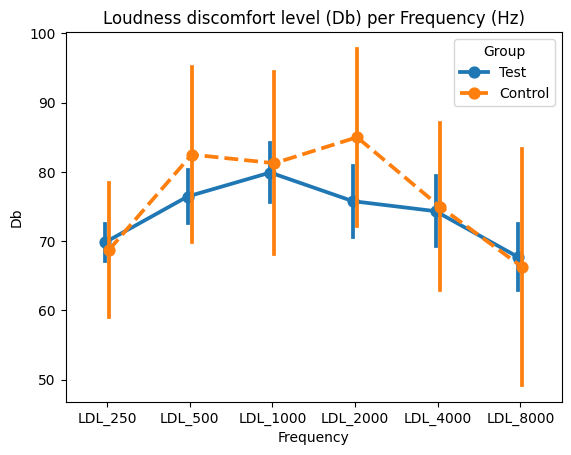

In [232]:
sns.pointplot(data=df_pointplots_ldl,x='Frequency', y = "Db", hue="Group", 
              linestyles=["-", "--"], errorbar="se", dodge=True)
plt.title("Loudness discomfort level (Db) per Frequency (Hz)")

plt.show()

### AvgHL

dataset must be in melt form

In [233]:
df_pointplots.head(5)

,Código de participante,Group,LDL_250,LDL_500,LDL_1000,LDL_2000,LDL_4000,LDL_8000,LDL_Ear,HL_250_R,...,HL_1000_L,HL_2000_L,HL_4000_L,HL_8000_L,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000
9,AC01,Test,60.0,60.0,70.0,70.0,50.0,55.0,L,20.0,...,10.0,10.0,15.0,20.0,10.0,10.0,10.0,10.0,15.0,20.0
10,AC02,Test,80.0,100.0,85.0,85.0,85.0,90.0,L,10.0,...,10.0,5.0,10.0,15.0,10.0,5.0,10.0,5.0,10.0,15.0
11,AC03,Test,80.0,100.0,90.0,95.0,100.0,100.0,L,20.0,...,5.0,5.0,5.0,5.0,10.0,10.0,5.0,5.0,5.0,5.0
12,AC04,Test,60.0,40.0,35.0,10.0,25.0,30.0,R,5.0,...,5.0,0.0,5.0,15.0,5.0,10.0,10.0,-5.0,5.0,10.0
13,AC05,Test,80.0,95.0,100.0,105.0,100.0,80.0,L,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0


In [234]:
# Split groups
df_pointplots_test= df_pointplots[df_pointplots["Group"]=="Test"]
df_pointplots_control= df_pointplots[df_pointplots["Group"]=="Control"]

# Melt for test
df_pointplots_test = pd.melt(df_pointplots_test, id_vars=['Código de participante'], value_vars=['HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000'])
df_pointplots_test["Group"] = "Test"

# Melt for control
df_pointplots_control = pd.melt(df_pointplots_control, id_vars=['Código de participante'], value_vars=['HL_250', 'HL_500', 'HL_1000',
       'HL_2000', 'HL_4000', 'HL_8000'])
df_pointplots_control["Group"] = "Control"

# Concat 
df_pointplots_hl = pd.concat([df_pointplots_test, df_pointplots_control])

df_pointplots_hl

,Código de participante,variable,value,Group
0,AC01,HL_250,10.0,Test
1,AC02,HL_250,10.0,Test
2,AC03,HL_250,10.0,Test
3,AC04,HL_250,5.0,Test
4,AC05,HL_250,5.0,Test
...,...,...,...,...
19,GC005,HL_4000,5.0,Control
20,GC001,HL_8000,-10.0,Control
21,GC002,HL_8000,-10.0,Control
22,GC003,HL_8000,10.0,Control


In [235]:
df_pointplots_hl.columns = ["ID", "Frequency", "Db", "Group"]

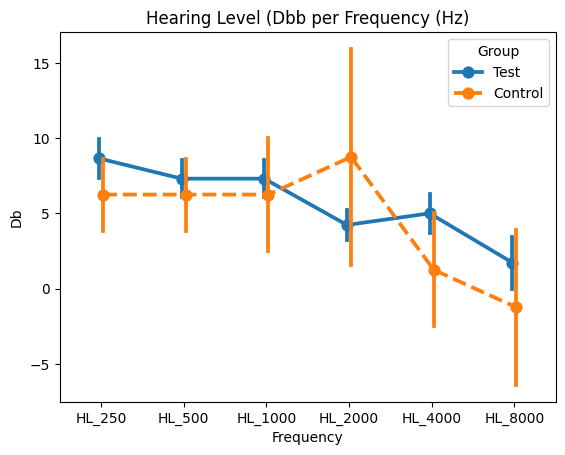

In [237]:
sns.pointplot(data=df_pointplots_hl,x='Frequency', y = "Db", hue="Group", 
              linestyles=["-", "--"], errorbar="se", dodge=True)
plt.title("Hearing Level (Dbb per Frequency (Hz)")

plt.show()

## Correlations

### AvgLDL x TW | AvgLDL x OPI

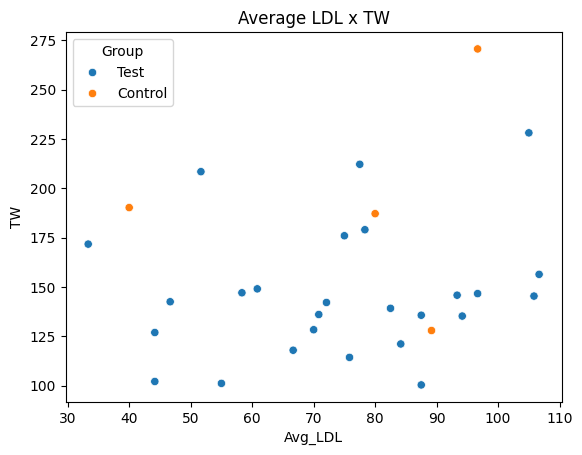

In [217]:
sns.scatterplot(data = df, x = "Avg_LDL", y = "TW", hue = "Group")
plt.title("Average LDL x TW")
plt.show()

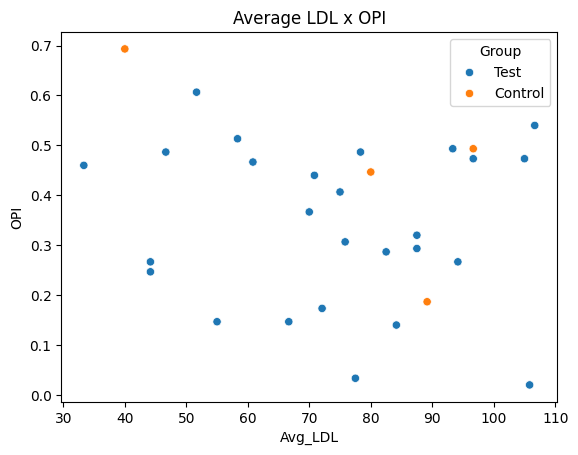

In [218]:
sns.scatterplot(data = df, x = "Avg_LDL", y = "OPI", hue = "Group")
plt.title("Average LDL x OPI")
plt.show()

### AvgHL most sensitive ear x OPI

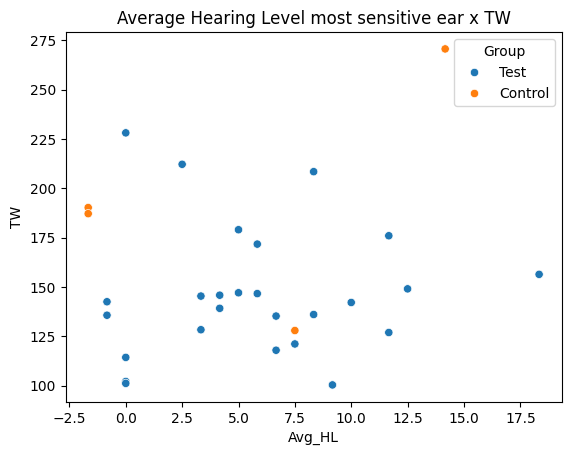

In [219]:
sns.scatterplot(data = df, x = "Avg_HL", y = "TW", hue = "Group")
plt.title("Average Hearing Level most sensitive ear x TW")
plt.show()

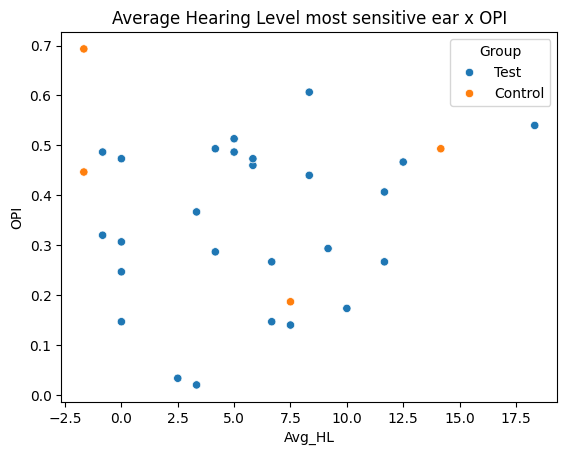

In [220]:
sns.scatterplot(data = df, x = "Avg_HL", y = "OPI", hue = "Group")
plt.title("Average Hearing Level most sensitive ear x OPI")
plt.show()
